# Data Mining and Visualization (83676)
# Final Project
## Part 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold 
from scipy import stats  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  
# from imblearn.over_sampling import ADASYN
# from imblearn.over_sampling import SMOTE 
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

#### Fucntions and Constants:

In [4]:
def ttest(first, second):
    ttest,pval = stats.ttest_rel(first, second)
    print("p-value:" , pval)
    if pval<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")

In [5]:
cv_number = 60

#### Loading the data:

In [6]:
data = pd.read_csv("./train.csv")
data.head()

,Unnamed: 0,Year_Birth,Education,Status,Income,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Response,Children
0,0,3,0,0,1,0.228898,0.424242,0.000670,0.005025,1.000000,...,1.000000,0.000000,0.05,0.0,0.0,0.0,0.0,0.0,0,0.333333
1,1,2,0,1,0,0.939914,0.656566,0.000670,0.005025,0.001160,...,0.000000,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,0,0.000000
2,2,3,0,2,0,0.071531,0.626263,0.048895,0.090452,0.037703,...,0.035714,0.000000,0.95,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,3,2,1,3,3,0.253219,0.767677,0.344943,0.236181,0.104408,...,0.214286,0.692308,0.35,0.0,0.0,0.0,0.0,0.0,0,0.666667
4,4,3,2,0,4,0.007153,0.212121,0.036839,0.080402,0.940255,...,1.000000,0.076923,0.30,0.0,0.0,0.0,0.0,0.0,0,0.000000


In [7]:
X = data.drop("Response",axis=1)
y = data["Response"]

In [8]:
n0 = len(data[data['Response']==0])
n1 = len(data[data['Response']==1])
total = n0 + n1
print(f"Class 0 precentage: {n0/total * 100} %")
print(f"Class 1 precentage: {n1/total * 100} %")

Class 0 precentage: 85.09874326750449 %
Class 1 precentage: 14.90125673249551 %


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

#### Decision Tree:

In [10]:
clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train,y_train)

y_prediction = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_prediction))
pd.DataFrame(metrics.confusion_matrix(y_test, y_prediction))

0.8301435406698564


,0,1
0,310,29
1,42,37


In [11]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

1.0


,0,1
0,1083,0
1,0,170


We have an enormous overfitting. Therefore, we shall change some hyperparamaters in order to reduce it.

First, we want to find the optimal max_depth of the tree:

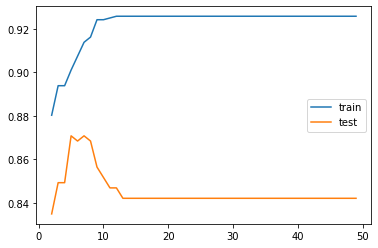

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
train_scores, test_scores = [], []
for k in range(2,50):
    clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=k, min_samples_split=15, min_samples_leaf=5, random_state=42)
    clf3.fit(X_train, y_train)
    train_scores.append(clf3.score(X_train, y_train))
    test_scores.append(clf3.score(X_test, y_test))
plt.plot(range(2,50), train_scores)
plt.plot(range(2,50), test_scores)
plt.legend(['train', 'test'])
plt.show()

We can see that max_depth of 5 is the optimal one. Therefore we will run CV with and without dummies:

In [13]:
df = data
dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 8]
X_dummies = pd.get_dummies(data = X, columns = dummies_col )

clf_a = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=5, min_samples_split=15, min_samples_leaf=5, random_state=42)
clf_b = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=5, min_samples_split=15, min_samples_leaf=5, random_state=42) 
X_ = X.to_numpy()
X_dummies = X_dummies.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cm_a, cm_b = [],[]
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    X_train_d, X_test_d = X_dummies[train_index], X_dummies[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    clf_b.fit(X_train_d,y_train)
    y_pred_a = clf_a.predict(X_test)
    y_pred_b = clf_b.predict(X_test_d)
    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    cm_b.append(metrics.confusion_matrix(y_test, y_pred_b))

acc_a = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
print(f"Accuracy of decision tree without dummies is {100 * np.mean(acc_a) :0.2f}%")

acc_b = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_b]
print(f"Accuracy of decision tree with dummies is {100 * np.mean(acc_b) :0.2f}%")


Accuracy of decision tree without dummies is 86.59%
Accuracy of decision tree with dummies is 87.07%


In [14]:
df = data
dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 8]
X_dummies_ = pd.get_dummies(data = X, columns = dummies_col )

clf_a = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=5, min_samples_split=15, min_samples_leaf=5, random_state=42)
clf_b = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=5, min_samples_split=15, min_samples_leaf=5, random_state=42) 

# accs = []
X_dummies = X_dummies_.to_numpy()
kf = KFold(n_splits=cv_number, shuffle=True, random_state=42)
cm_a, cm_b = [],[]
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    X_train_d, X_test_d = X_dummies[train_index], X_dummies[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train_d,y_train)
    clf_b.fit(X_train_d,y_train)
    y_pred_a = clf_a.predict(X_test_d)
    y_pred_b = clf_b.predict(X_train_d)
    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    cm_b.append(metrics.confusion_matrix(y_train, y_pred_b))
    # accs.append(metrics.accuracy_score(y_test, y_pred_a))

acc_a = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
print(f"Accuracy of test with dummies is {np.mean(acc_a)}")

acc_b = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_b]
print(f"Accuracy of train (overfitting) with dummies is {np.mean(acc_b)}")
# print(np.mean(accs))

DT_first_accuracy = acc_a
DT_first = clf_a

Accuracy of test with dummies is 0.856305114638448
Accuracy of train (overfitting) with dummies is 0.8981935515956755


In [15]:
clf_a.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

We got a pretty decent accuracy, but we can try to improve it, by running random search:

In [16]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [17]:
criterion = ['gini', 'entropy']
max_depth = list(range(4,7))
min_samples_split = list(range(11,16))
min_samples_leaf = list(range(4,7))
# splitter = 'best'

random_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
            #    'splitter' : splitter,
               'min_samples_leaf': min_samples_leaf}

In [18]:
decision_tree_random = RandomizedSearchCV(estimator = decision_tree, param_distributions = random_grid, n_iter = 1000, cv = cv_number,
                                verbose=2, random_state = 42, n_jobs = -1)

decision_tree_random.fit(X_train, y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 90 is smaller than n_iter=1000. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 60 folds for each of 90 candidates, totalling 5400 fits


RandomizedSearchCV(cv=60, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [11, 12, 13, 14,
                                                              15]},
                   random_state=42, verbose=2)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = metrics.accuracy_score(y_test, decision_tree_y_pred)
print('base model accuracy = {:0.2f}%'.format(decision_tree_accuracy*100))

best_random = decision_tree_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - decision_tree_accuracy)))

base model accuracy = 83.01%
random model accuracy = 89.23%
Improvement of 6.22%.


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [20]:
decision_tree_random.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=14, random_state=42)

In [21]:
reslts = pd.DataFrame(decision_tree_random.cv_results_)
best = reslts[reslts["params"] == decision_tree_random.best_params_]
scores_rs = [ (float(best[f"split{i}_test_score"])) for i in range(cv_number) ]

In [76]:
param_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
            #    'splitter' : splitter,
               'min_samples_leaf': min_samples_leaf}

grid_search = GridSearchCV(estimator = decision_tree, param_grid = param_grid, cv = cv_number, n_jobs = -1, verbose=2)

In [77]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 13}

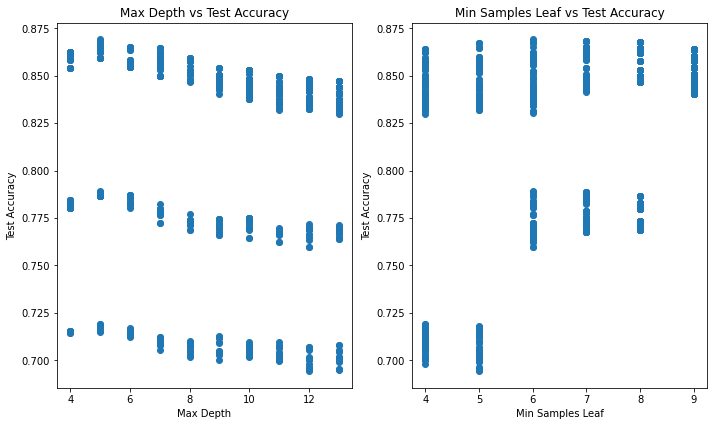

In [108]:
# param_max_depth_ = grid_search.cv_results_["param_max_depth"]
# param_min_samples_leaf = grid_search.cv_results_["param_min_samples_leaf"]
# scores__ = grid_search.cv_results_['mean_test_score']

# plt.subplots(1, 2, figsize=(10, 6))

# plt.subplot(1,2,1)


# plt.scatter(param_max_depth_.data, scores__)
# plt.xlabel('Max Depth')
# plt.ylabel('Test Accuracy')
# plt.title('Max Depth vs Test Accuracy' )

# plt.subplot(1,2,2)

# plt.scatter(param_min_samples_leaf.data, scores__)
# plt.xlabel('Min Samples Leaf')
# plt.ylabel('Test Accuracy')
# plt.title('Min Samples Leaf vs Test Accuracy' )

# plt.tight_layout(pad = 1)

In [24]:
decision_tree.fit(X_train, y_train)
decision_tree_y_decision_treepred = decision_tree.predict(X_test)
decision_tree_accuracy = metrics.accuracy_score(y_test, decision_tree_y_pred)
print('base model accuracy = {:0.2f}%'.format(decision_tree_accuracy*100))

base model accuracy = 83.01%


In [25]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - decision_tree_accuracy)))

grid model accuracy = 84.21%
Improvement of 1.20%.


In [26]:
reslts = pd.DataFrame(grid_search.cv_results_)
best = reslts[reslts["params"] == grid_search.best_params_]
scores_grid = [ (float(best[f"split{i}_test_score"])) for i in range(cv_number) ]

print("random search model vs grid search model:\n------------------------------")
ttest(scores_grid, scores_rs)
print("\n\nrandom search model vs first model:\n------------------------------")
ttest(scores_grid, DT_first_accuracy)
print("\n\nfirst model vs grid search:\n------------------------------")
ttest(DT_first_accuracy, scores_rs)

random search model vs grid search model:
------------------------------
p-value: 0.9098427406383669
accept null hypothesis


random search model vs first model:
------------------------------
p-value: 0.0560598783017354
accept null hypothesis


first model vs grid search:
------------------------------
p-value: 0.029894047997118308
reject null hypothesis


In [27]:
print(f"first model: {100 * np.mean(DT_first_accuracy) : .2f}%")
print(f"random model: {100 * np.mean(scores_rs) : .2f}%")
print(f"grid model: {100 * np.mean(scores_grid) : .2f}%")

DT_grid = best_grid
DT_rs = best_random

first model:  85.63%
random model:  87.91%
grid model:  87.80%


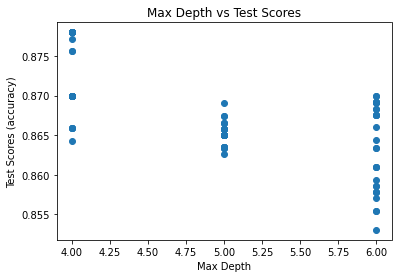

In [28]:
test_scores = grid_search.cv_results_['mean_test_score']
train_time = grid_search.cv_results_['mean_fit_time']
param_max_depth = list(grid_search.cv_results_['param_max_depth'])

plt.scatter(param_max_depth, test_scores)
plt.xlabel('Max Depth')
plt.ylabel('Test Scores (accuracy)')
plt.title('Max Depth vs Test Scores')
plt.show()

##### Precision Index

Unfortunately, we have no statistical significance, so we can not determine for sure which is the best model. Therfore, we will check for precision index of each one of the models.

In [29]:
DT_grid_precision = cross_validate(DT_grid, X, y, scoring="precision",cv=5)
DT_rs_precision = cross_validate(DT_rs, X, y, scoring="precision",cv=5)
DT_first_precision = cross_validate(DT_first, X, y, scoring="precision",cv=5)

In [30]:
mn_grid = np.mean(DT_grid_precision["test_score"])
mn_first = np.mean(DT_first_precision["test_score"])
mn_random = np.mean(DT_rs_precision["test_score"])

print(f"grid model precision = {mn_grid : 0.2f}")
print(f"first model precision = {mn_first : 0.2f}")
print(f"random search model precision = {mn_random : 0.2f}")

grid model precision =  0.62
first model precision =  0.53
random search model precision =  0.57


In [31]:
print("random search model vs grid search model:\n------------------------------")
ttest(DT_grid_precision["test_score"], DT_rs_precision["test_score"])
print("\n\nrandom search model vs first model:\n------------------------------")
ttest(DT_grid_precision["test_score"], DT_first_precision["test_score"])
print("\n\nfirst model vs grid search:\n------------------------------")
ttest(DT_first_precision["test_score"], DT_rs_precision["test_score"])

random search model vs grid search model:
------------------------------
p-value: 0.5751617247172165
accept null hypothesis


random search model vs first model:
------------------------------
p-value: 0.14534526320109112
accept null hypothesis


first model vs grid search:
------------------------------
p-value: 0.5199505456438476
accept null hypothesis


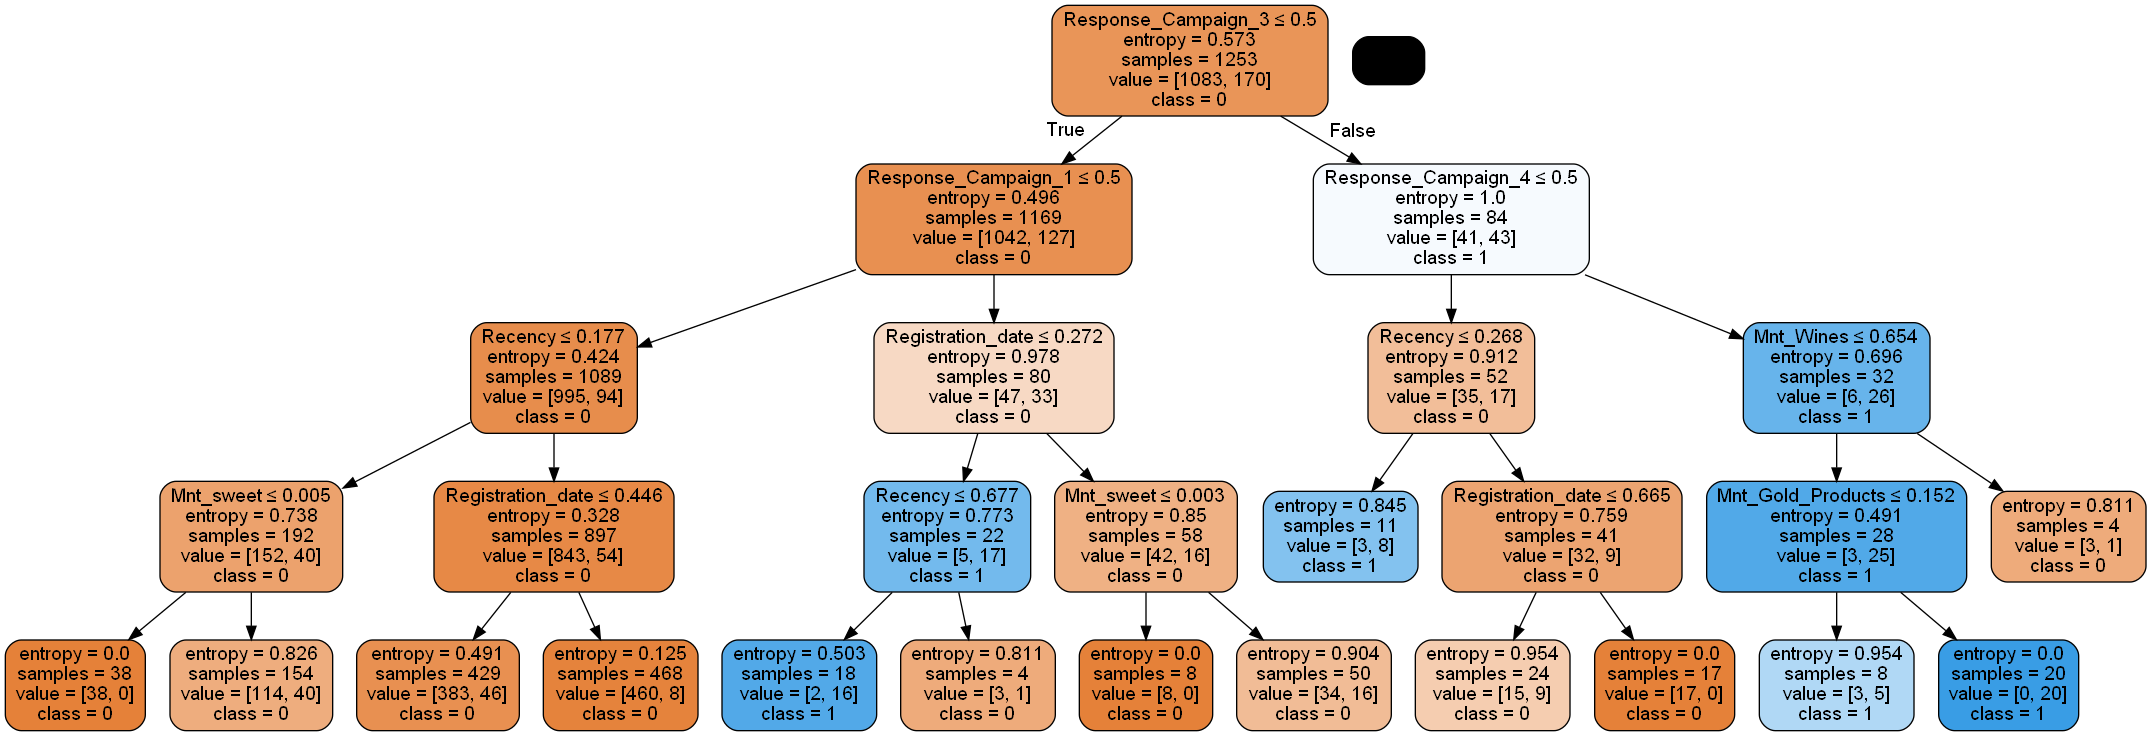

In [32]:
dot = export_graphviz(DT_grid, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())



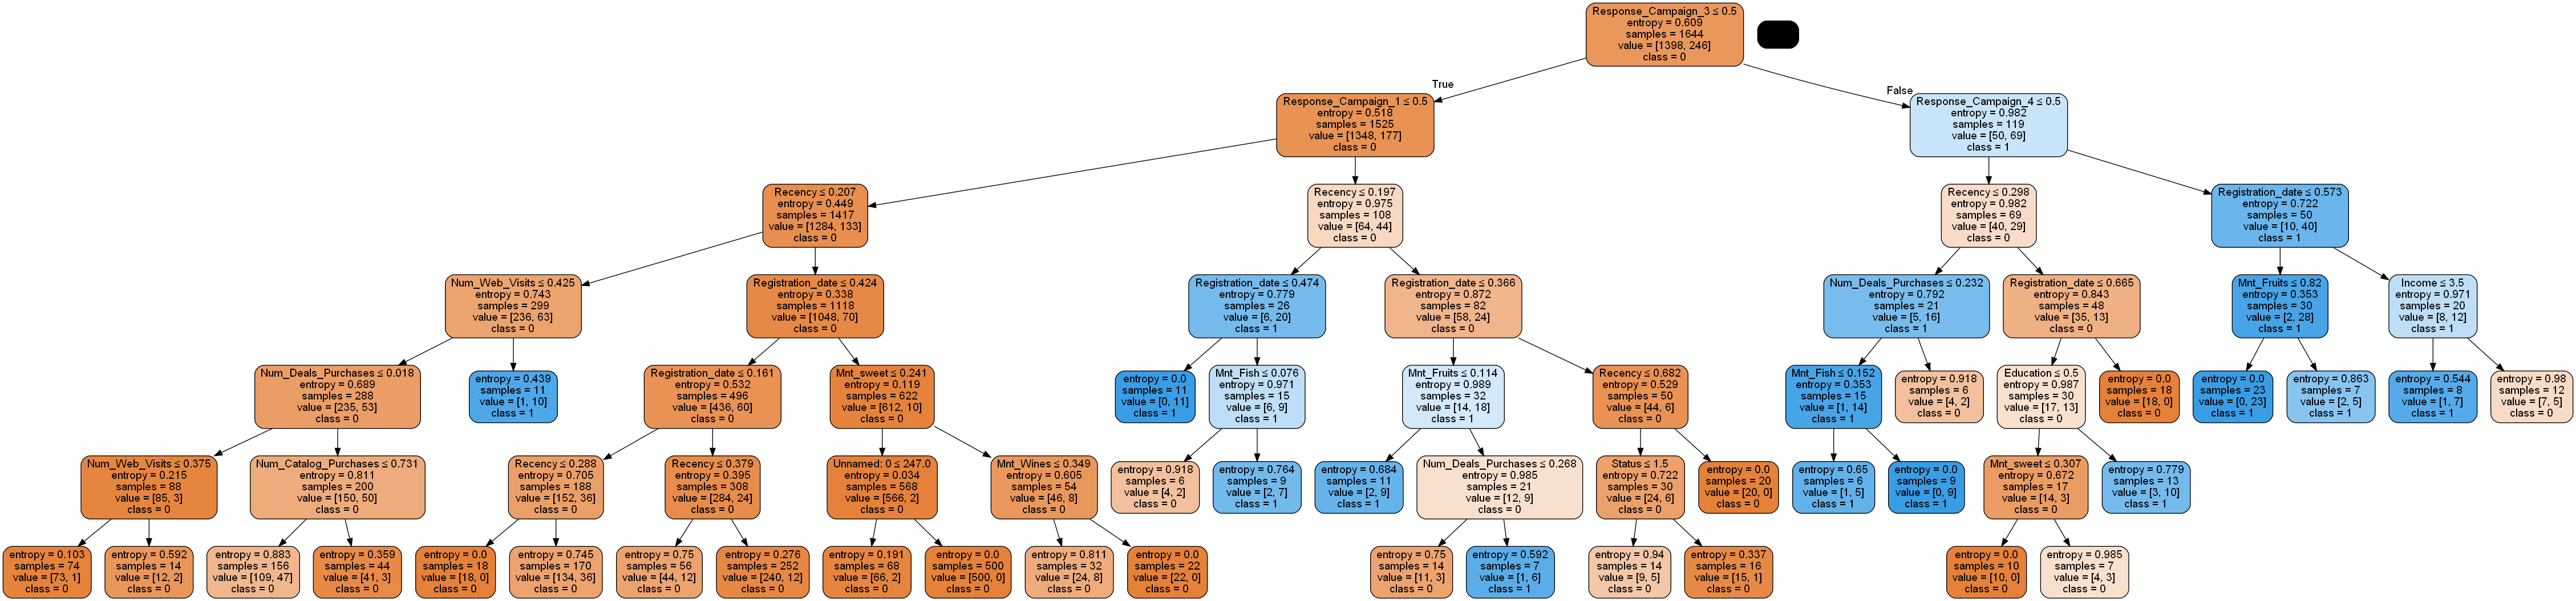

In [33]:
dot = export_graphviz(DT_rs, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())



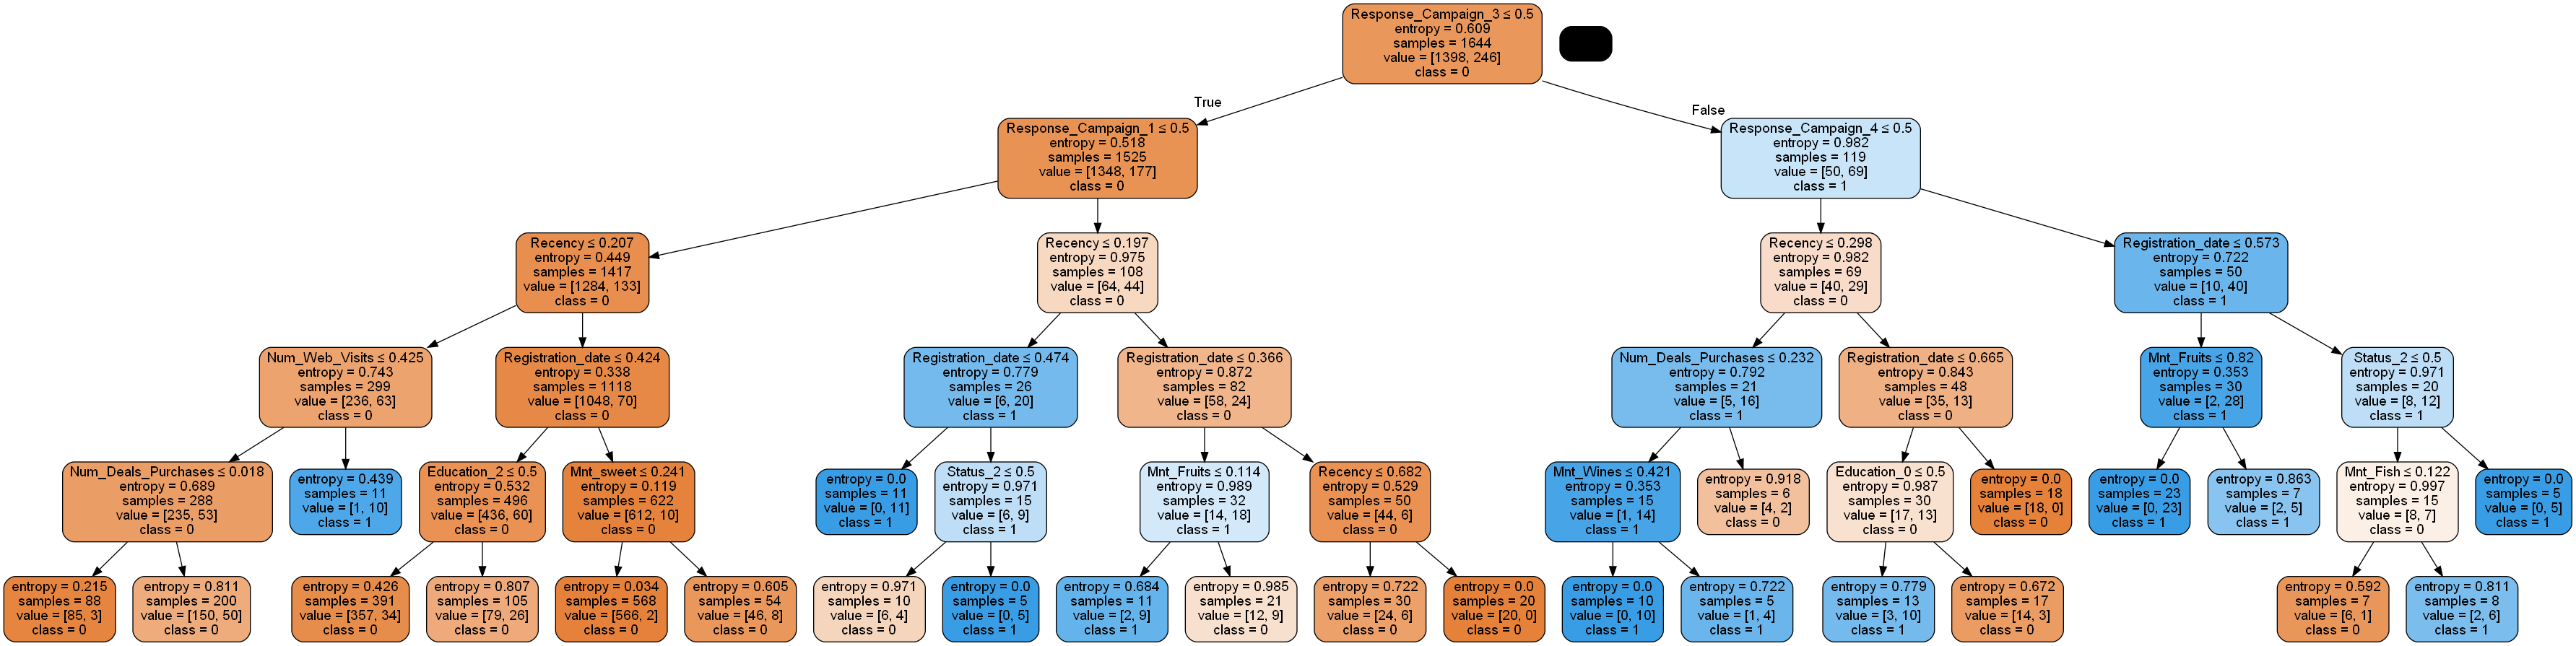

In [34]:
dot = export_graphviz(DT_first, filled=True, rounded=True, 
                special_characters=True,feature_names = X_dummies_.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

So far, we've been focusing the accuracy index. Now we want to investigate and maximize the precision index, since we want to maximize our correct predictions amoung all positibe predicitons.

If so, we will run random search on decision tree, in which we will maximize precision index:

In [35]:
criterion = ['gini', 'entropy']
max_depth = list(range(4,7))
min_samples_split = list(range(11,16))
min_samples_leaf = list(range(4,7))
# splitter = 'best'

random_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
            #    'splitter' : splitter,
               'min_samples_leaf': min_samples_leaf}

In [36]:
decision_tree_random = RandomizedSearchCV(estimator = decision_tree, param_distributions = random_grid, n_iter = 100, cv = 10,
                                verbose=2, random_state = 42, n_jobs = -1,scoring='precision')

decision_tree_random.fit(X_train, y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 90 candidates, totalling 900 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [11, 12, 13, 14,
                                                              15]},
                   random_state=42, scoring='precision', verbose=2)

In [37]:
DT_rs_precision = decision_tree_random.best_estimator_
decision_tree_random.best_params_

{'min_samples_split': 11,
 'min_samples_leaf': 6,
 'max_depth': 4,
 'criterion': 'entropy'}

In [38]:
reslts = pd.DataFrame(decision_tree_random.cv_results_)
best = reslts[reslts["params"] == decision_tree_random.best_params_]
DT_rs_precision_scores = [ (float(best[f"split{i}_test_score"])) for i in range(10) ]


Now we will try to run grid search, since it may find better hyper-paramters:

In [39]:
param_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
            #    'splitter' : splitter,
               'min_samples_leaf': min_samples_leaf}

grid_search = GridSearchCV(estimator = decision_tree, param_grid = param_grid, cv = 10, n_jobs = -1, verbose=2,scoring='precision')

In [40]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 90 candidates, totalling 900 fits


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 11}

That is the exact same model random search has produced.

In [41]:
DT_grid_precision = grid_search.best_estimator_
reslts = pd.DataFrame(grid_search.cv_results_)
best = reslts[reslts["params"] == grid_search.best_params_]
DT_grid_precision_scores = [ (float(best[f"split{i}_test_score"])) for i in range(10) ]

In [42]:
decision_tree = DecisionTreeClassifier(random_state=42)
DT_base = cross_validate(decision_tree, X, y, scoring="precision",cv=10)
mn = np.mean(DT_base["test_score"])

In [43]:

print(f"grid search average precision = {100 * np.mean(DT_grid_precision_scores) :.2f}%")
print(f"base average precision = {100*mn :.2f}%")
print(f"random search average precision = {100*np.mean(DT_rs_precision_scores):.2f}%")

grid search average precision = 59.81%
base average precision = 37.05%
random search average precision = 59.81%


Notice that grid and random searched produces the same model, hence the equal precision.

In [44]:
print(f"Improvement of {100*np.mean(DT_rs_precision_scores) - 100*mn:.2f}%")

Improvement of 22.76%


Check for statistiacal significance:

In [45]:
ttest(DT_grid_precision_scores,DT_base["test_score"])

p-value: 0.010623505575046582
reject null hypothesis


Indeed we got a better model.

To conclude, when we will compare decision tree with other models, we will compare the grid search one

In [46]:
DT_accuracy = DT_grid
DT_accuracy_scores = scores_grid
DT_precision = DT_grid_precision

#### SVM:

First, we want to see the effect of the hyper-parameter C on the accuracy:

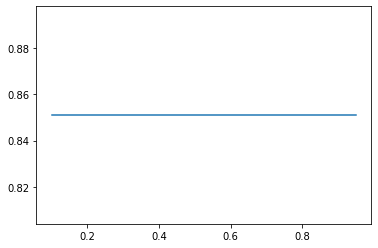

In [47]:

cm_ = []
for k in np.arange(0.1,1, 0.05):
    clf_a = svm.SVC(kernel='rbf', C=k, probability=True)
    df = data
    X_ = X.to_numpy()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cm_a = []
    for train_index, test_index in kf.split(X_):
        X_train, X_test = X_[train_index], X_[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf_a.fit(X_train,y_train)
        y_pred_a = clf_a.predict(X_test)
        cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    cm_.append(cm_a)

accuracies = [np.mean([(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_i]) for cm_i in cm_]
plt.plot(np.arange(0.1,1, 0.05), accuracies)
plt.show()


As we can see, the parameter C has no effect at all on the accuracy. Therefore we will set it on 0.9 .

In [48]:
cm_ = []

for k in ['poly', 'rbf', 'sigmoid']:
    clf_a = svm.SVC(kernel=k, C=0.9, probability=True)
    df = data
    dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 8]
    X_dummies = pd.get_dummies(data = X, columns = dummies_col )
    X_ = X.to_numpy()
    X_dummies = X_dummies.to_numpy()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    cm_a = []
    for train_index, test_index in kf.split(X_):
        X_train, X_test = X_[train_index], X_[test_index]
        X_train_d, X_test_d = X_dummies[train_index], X_dummies[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf_a.fit(X_train,y_train)
        y_pred_a = clf_a.predict(X_test)
        cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    cm_.append((cm_a, k))



In [49]:
accuracies = [(np.mean([(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_i]), k) for cm_i,k in cm_]
for t in accuracies:
    print(f"Accuracy of {t[1] : <{8}}: {t[0] :>{8}}")
SVM_accuracy = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_[1][0]]

Accuracy of poly    : 0.8510051325919589
Accuracy of rbf     : 0.8510051325919589
Accuracy of sigmoid : 0.7737952666096379


As we can see, between poly and rbf there is no difference at all, and both are better than sigmoid. Ergo we will set the kernel to be rbf (which is also the diffult one).

Now we will check for overfitting:

In [50]:
clf_a = svm.SVC(kernel='rbf', C=0.9, probability=True)
df = data
X_ = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cm_a = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    y_pred_a = clf_a.predict(X_train)
    cm_a.append(metrics.confusion_matrix(y_train, y_pred_a))

print(f"Accuracy (predict on train) = {float(100 * np.mean([(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a])):.2f}%")

Accuracy (predict on train) = 85.10%


As we can see, there is no overfitting.

#### Decision Tree vs SVM:

From documentation: "This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values."

Namely, the null hypothesis is that Decision Tree and SVM have the same accuracy.

In [51]:
ttest(np.random.choice(DT_accuracy_scores,10), SVM_accuracy)

p-value: 0.03374720523913812
reject null hypothesis


i.e. we can assure that D.T's accuracy is indeed better than SVM's.

#### Random Forest

In [52]:
rf = RandomForestClassifier(random_state = 42)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 15)]

max_features = ['auto', 'log2', 2, 5, 7]

max_depth = [int(x) for x in range(2, 8)]
max_depth.append(None)

min_samples_split = [2, 5, 10, 15, 20]

min_samples_leaf = [1, 3, 5, 10, 15]

max_samples = [0.1, 0.3, 0.5, 0.7]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}

In [53]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, None],
                                        'max_features': ['auto', 'log2', 2, 5,
                                                         7],
                                        'max_samples': [0.1, 0.3, 0.5, 0.7],
                                        'min_samples_leaf': [1, 3, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 80, 151, 222, 292,
                                                         363, 434, 504, 575,
                                                         646, 717, 787, 858,
                                                         929, 1000]},
                   random_state=42, verbose=2)

In [54]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
print('base model accuracy = {:0.2f}%'.format(rf_accuracy*100))

best_random = rf_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - rf_accuracy) / rf_accuracy))

base model accuracy = 88.62%
random model accuracy = 87.43%
Improvement of -1.35%.


In [55]:
random_depth = [best_random.estimators_[i].get_depth() for i in range(best_random.get_params()['n_estimators'])]
print('Random max depth: ', max(random_depth))
print('Random min depth: ', min(random_depth))

rf_depth = [rf.estimators_[i].get_depth() for i in range(rf.get_params()['n_estimators'])]
print('Base max depth: ', max(rf_depth))
print('Base min depth: ', min(rf_depth))

Random max depth:  6
Random min depth:  6
Base max depth:  23
Base min depth:  13


In [56]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [57]:
rf_random.best_params_

{'n_estimators': 717,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_samples': 0.7,
 'max_features': 5,
 'max_depth': 6}

In [58]:
param_grid = {'n_estimators': [100,500,717],
              'min_samples_split': [5,15,20],
              'min_samples_leaf': [10, 5],
              'max_features': ['log2', 5,7],
              'max_depth': [6,5],
              'max_samples': [0.7, 0.8]}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

In [59]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'max_depth': 6,
 'max_features': 5,
 'max_samples': 0.7,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

In [60]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - rf_accuracy) / rf_accuracy))

grid model accuracy = 87.43%
Improvement of -1.35%.


Unfortuntely, we couldn't get any better from the base model, however, we can see the base model has an enormous overfitting of 100 %:

In [61]:
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train, rf_y_pred)
print('base model accuracy (predict on train) = {:0.2f}%'.format(rf_accuracy*100))

base model accuracy (predict on train) = 100.00%


However, the model that grid-search had produce does not have overfitting at all:

In [62]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)
grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
print('grid model accuracy (predict on train) = {:0.2f}%'.format(grid_accuracy*100))

grid model accuracy (predict on train) = 87.43%


Therefore, we will choose the model produced by grid-search.

In [63]:
BEST_random_forest = best_grid

In [64]:
clf_a = BEST_random_forest
df = data
X_ = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cm_a = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    y_pred_a = clf_a.predict(X_test)
    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))

acc_a = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
print(f"Accuracy of clf_a is {np.mean(acc_a)}")
RF_accuracy = acc_a

Accuracy of clf_a is 0.8647562018819505


In [65]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_max_samples', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

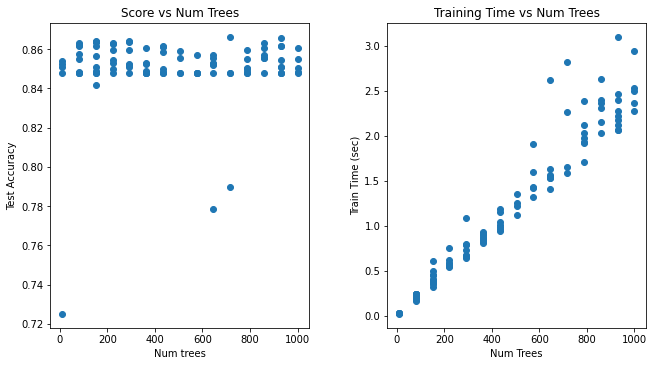

In [66]:
test_scores = rf_random.cv_results_['mean_test_score']
train_time = rf_random.cv_results_['mean_fit_time']
param_values = list(rf_random.cv_results_['param_n_estimators'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.scatter(param_values, test_scores)
plt.xlabel('Num trees')
plt.ylabel('Test Accuracy')
plt.title('Score vs Num Trees' )

plt.subplot(122)
plt.scatter(param_values, train_time)
plt.xlabel('Num Trees')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs Num Trees')

plt.tight_layout(pad = 4)

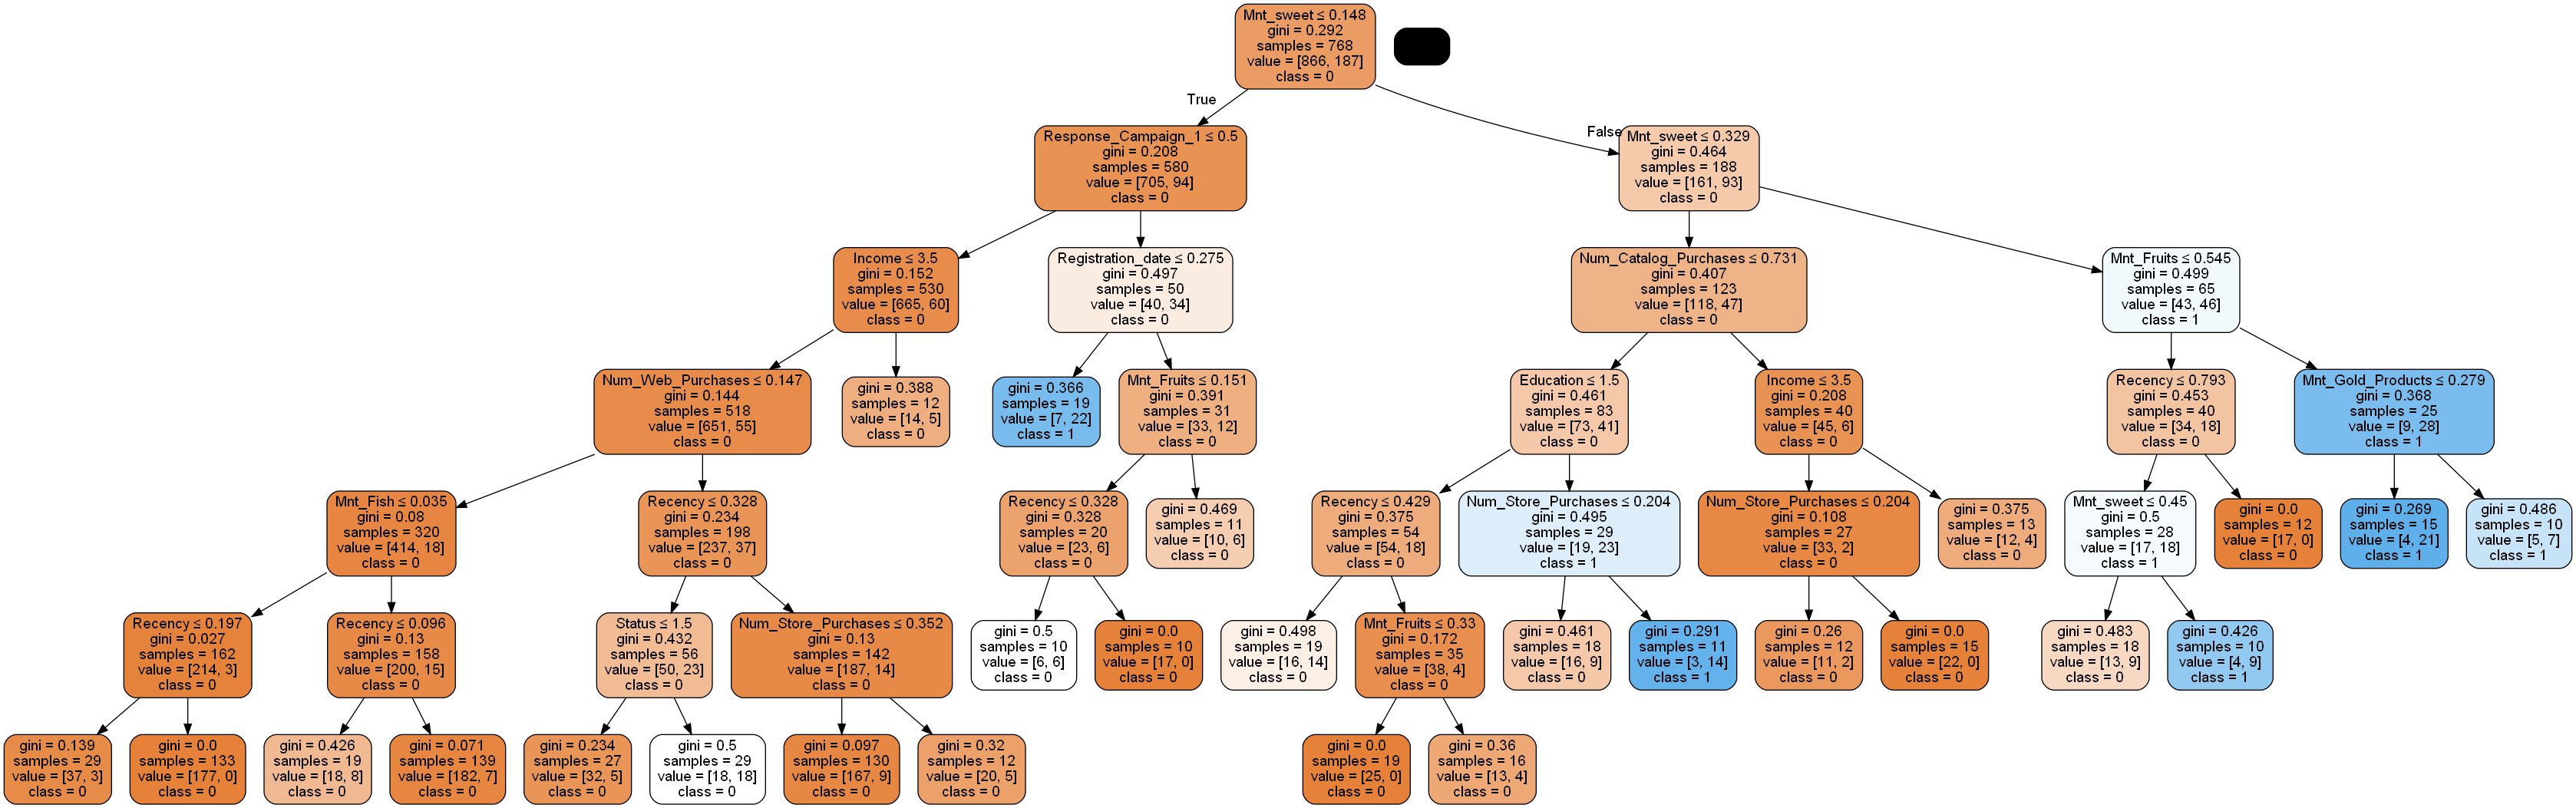

In [67]:
dot = export_graphviz(BEST_random_forest.estimators_[15], filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

#### Decision Tree vs Random Forest:



From documentation: "This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values."

In [76]:

ttest_,pval = stats.ttest_rel(np.random.choice(DT_accuracy_scores,10), RF_accuracy)
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


p-value: 0.4339388400753251
accept null hypothesis


Namely, we can not determine which model is better.

#### Naive Base

In [113]:
naive_base = GaussianNB()

In [114]:
naive_base.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Naive Base does not have hyperparamters to 

In [115]:
clf_a = naive_base
df = data
X_ = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cm_a = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    y_pred_a = clf_a.predict(X_test)
    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))

acc_a = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
precision_a = [(cm[1][1])/sum(cm[:,1]) for cm in cm_a]
print(f"Accuracy of naive base is  {100 * np.mean(acc_a) :.2f} %")
print(f"Precision of naive base is {100 * np.mean(precision_a) :.2f} %")

NB_accuracy = acc_a

Accuracy of naive base is  81.39 %
Precision of naive base is 39.35 %


Check for overfitting:

In [116]:
clf_a = naive_base
df = data
X_ = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cm_a = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    y_pred_a = clf_a.predict(X_train)
    cm_a.append(metrics.confusion_matrix(y_train, y_pred_a))

acc_a = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
print(f"Accuracy of naive base (predict on train) is {np.mean(acc_a)}")

Accuracy of naive base (predict on train) is 0.8219298105915829


#### Naive Base vs Decision Tree:

In [117]:
ttest(np.random.choice(DT_accuracy_scores,10), NB_accuracy)

p-value: 0.0012174647171582652
reject null hypothesis


I.E decision tree is indeed better.

#### K-Nearest-Neighbors:

In [81]:
k_neighbors = KNeighborsClassifier()
k_neighbors.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [96]:
n_neighbors = [int(x) for x in np.linspace(start = 3, stop = 50, num = 15)]

weights = ['uniform', 'distance']

leaf_size = [int(x) for x in np.linspace(start = 15, stop = 50, num = 5)]

p = [1,2]

random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'leaf_size': max_depth,
               'p': p}

In [97]:
k_neighbors_random = RandomizedSearchCV(estimator = k_neighbors, param_distributions = random_grid, n_iter = 1000, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1)

k_neighbors_random.fit(X_train, y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 180 is smaller than n_iter=1000. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 180 candidates, totalling 900 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'leaf_size': [4, 5, 6],
                                        'n_neighbors': [3, 6, 9, 13, 16, 19, 23,
                                                        26, 29, 33, 36, 39, 43,
                                                        46, 50],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [98]:
k_neighbors_grid = GridSearchCV(estimator = k_neighbors, param_grid = random_grid, cv = 5,
                                verbose=2, n_jobs = -1)

k_neighbors_grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [4, 5, 6],
                         'n_neighbors': [3, 6, 9, 13, 16, 19, 23, 26, 29, 33,
                                         36, 39, 43, 46, 50],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [99]:
k_neighbors_random.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 29, 'leaf_size': 4}

In [100]:
k_neighbors_grid.best_params_

{'leaf_size': 4, 'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

In [101]:
k_neighbors.fit(X_train, y_train)
k_neighbors_y_pred = k_neighbors.predict(X_test)
k_neighbors_accuracy = metrics.accuracy_score(y_test, k_neighbors_y_pred)
print('base model accuracy = {:0.2f}%'.format(k_neighbors_accuracy*100))

best_random = k_neighbors_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))

best_grid = k_neighbors_grid.best_estimator_
random_y_pred = best_grid.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('grid model accuracy = {:0.2f}%'.format(random_accuracy*100))

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - k_neighbors_accuracy)))

base model accuracy = 81.44%
random model accuracy = 85.03%
grid model accuracy = 85.03%
Improvement of 3.59%.


In [102]:
clf_a = best_random
df = data
X_ = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cm_a = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    y_pred_a = clf_a.predict(X_train)
    cm_a.append(metrics.confusion_matrix(y_train, y_pred_a))

acc_random = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
print(f"Accuracy of random model (overfitting) is {100 * np.mean(acc_a) :.2f} %")

Accuracy of random model (overfitting) is 85.63 %


In [94]:
clf_a = best_grid
df = data
X_ = X.to_numpy()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cm_a = []
for train_index, test_index in kf.split(X_,y.to_numpy()):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_a.fit(X_train,y_train)
    y_pred_a = clf_a.predict(X_train)
    cm_a.append(metrics.confusion_matrix(y_train, y_pred_a))

acc_grid = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_a]
print(f"Accuracy of grid (overfitting) is {100 * np.mean(acc_a) :.2f} %")


Accuracy of grid (overfitting) is 85.63 %


Although the grid model and the random model differ a bit, they produce the same results.

In [103]:
grid_cv = cross_validate(best_grid, X, y,cv=cv_number)
random_cv = cross_validate(best_random, X, y,cv=cv_number)

In [104]:
ttest(grid_cv["test_score"], random_cv["test_score"])

p-value: nan
accept null hypothesis


They are identical

In [107]:
k_neighbors_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_leaf_size', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

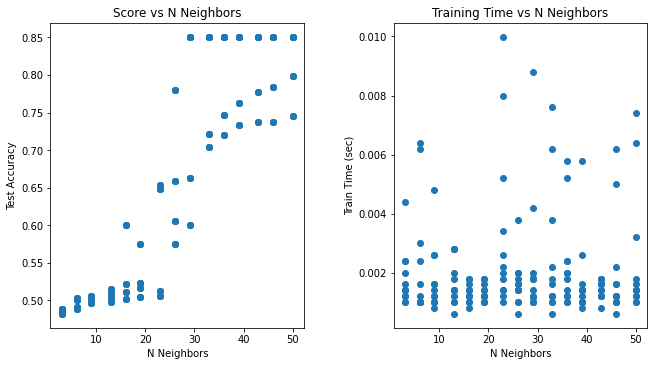

In [112]:
test_scores = k_neighbors_grid.cv_results_['mean_test_score']
train_time = k_neighbors_grid.cv_results_['mean_fit_time']
param_values = list(k_neighbors_grid.cv_results_['param_n_neighbors'])

plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.scatter(param_values, test_scores)
plt.xlabel('N Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Score vs N Neighbors' )

plt.subplot(122)
plt.scatter(param_values, train_time)
plt.xlabel('N Neighbors')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs N Neighbors')

plt.tight_layout(pad = 4)

##### K_Nieghbors vs Decision Tree:

In [135]:
ttest(grid_cv["test_score"], DT_accuracy_scores)

p-value: 0.00015463410247068822
reject null hypothesis


Decision tree is better.

##### Precision:

In [137]:
n_neighbors = [int(x) for x in np.linspace(start = 3, stop = 50, num = 15)]

weights = ['uniform', 'distance']

leaf_size = [int(x) for x in np.linspace(start = 15, stop = 50, num = 5)]

p = [1,2]

random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'leaf_size': max_depth,
               'p': p}

In [138]:
k_neighbors_random = RandomizedSearchCV(estimator = k_neighbors, param_distributions = random_grid, n_iter = 100, cv = 5,
                                verbose=2, random_state = 42, n_jobs = -1,scoring='precision')

k_neighbors_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'leaf_size': [4, 5, 6],
                                        'n_neighbors': [3, 6, 9, 13, 16, 19, 23,
                                                        26, 29, 33, 36, 39, 43,
                                                        46, 50],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='precision', verbose=2)

In [139]:
k_neighbors_grid = GridSearchCV(estimator = k_neighbors, param_grid = random_grid, cv = 5,
                                verbose=2, n_jobs = -1,scoring='precision')

k_neighbors_grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [4, 5, 6],
                         'n_neighbors': [3, 6, 9, 13, 16, 19, 23, 26, 29, 33,
                                         36, 39, 43, 46, 50],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='precision', verbose=2)

In [142]:
best_grid_precision = k_neighbors_grid.best_estimator_
best_random_precision = k_neighbors_random.best_estimator_


In [144]:
grid_precision_cv = cross_validate(best_grid_precision, X, y, scoring="precision",cv=10)
random_precision_cv = cross_validate(best_random_precision, X, y, scoring="precision",cv=10)


c:\Users\talro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\talro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\talro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\talro\AppData\Local

In [146]:
grid_precision_cv

{'fit_time': array([0.00690174, 0.00400281, 0.00400138, 0.00600719, 0.00699091,
        0.00600147, 0.00499487, 0.00702262, 0.00599813, 0.00699902]),
 'score_time': array([0.02697492, 0.02299428, 0.0231452 , 0.0367043 , 0.03200483,
        0.04598927, 0.03500795, 0.04300523, 0.05098271, 0.05500078]),
 'test_score': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

#### Predict on Test

In [73]:
test_data = pd.read_csv("./test.csv")

In [74]:
test_model = DT_accuracy

In [75]:
test_model.fit(X.to_numpy(),y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=12, random_state=42)

In [76]:
y_test_predict = test_model.predict(test_data.to_numpy())

In [77]:
test_data["Response"] = y_test_predict

In [78]:
test_data["Response"]

0      0
1      0
2      0
3      0
4      0
      ..
552    0
553    0
554    0
555    0
556    0
Name: Response, Length: 557, dtype: int64

In [79]:
test_data.to_csv("test_with_response.csv")

In [80]:
n0 = len(test_data[test_data['Response']==0])
n1 = len(test_data[test_data['Response']==1])
total = n0 + n1
print(f"Class 0 precentage: {n0/total * 100} %")
print(f"Class 1 precentage: {n1/total * 100} %")

Class 0 precentage: 94.25493716337523 %
Class 1 precentage: 5.745062836624776 %
